<a href="https://www.kaggle.com/code/tanbeerjubaer/movie-rating-final-version?scriptVersionId=131715036" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/movie-review/The Dark Knight 2008.csv
/kaggle/input/movie-review/Star Wars Episode VIII - The Last Jedi 2017.csv
/kaggle/input/movie-review/The Lord of the Rings The Fellowship of the Ring 2001.csv
/kaggle/input/movie-review/Joker 2019.csv
/kaggle/input/movie-review/Star Wars Episode VII - The Force Awakens 2015.csv


In [1]:
# Import all the tools we need


# Regular EDA(exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


%matplotlib inline

## Import data

In [2]:
df = pd.read_csv('/kaggle/input/movie-review/Joker 2019.csv')

In [3]:
df.shape

(10046, 7)

## Check for Null values

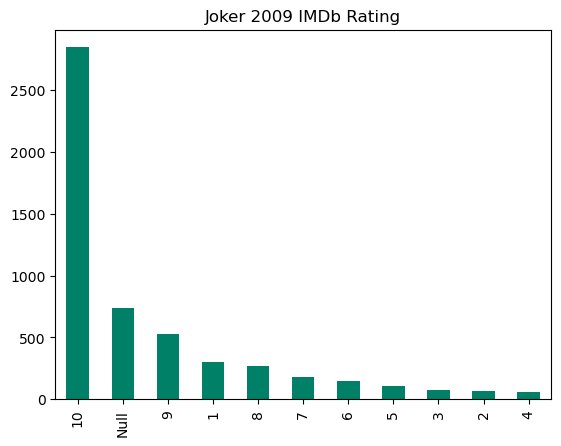

In [16]:
df.rating.value_counts().plot(kind='bar', cmap='summer', title='Joker 2009 IMDb Rating');

In [5]:
li = []
for rev in df.review:
    li.append(len(rev))
    if len(rev) == 2771:
        print(rev, end='\n ended\n')

In [6]:
li.sort()
li[:10]

[44, 51, 51, 52, 53, 54, 55, 55, 57, 57]

In [7]:
li.sort(reverse=True)
li[1000:1010]

[1992, 1992, 1992, 1988, 1987, 1985, 1984, 1983, 1982, 1981]

## Important functions

In [4]:
def setup_data(df):
    '''
    Preprocess some basic works
    '''
    # Drop every column except the specified column
    df = df[['rating', 'review']]
    # Drop Null rows
    df = df[~(df == 'Null').any(axis=1)]
    
    
    return df

def remove_big_review(rev):
    '''
    Removes big review greter than length
    '''
    if len(rev)>3000:
        rev = 'Null'
    return rev

def clean_text(test):
    '''
    Clean's up the unnecessary thiings of a text by replacing them with proper symbols.
    '''
    test = test.replace('<br/>', '')
    test = test.replace('--', ' ')
    test = test.replace("'", '')
    test = test.replace('"','')
    test = test.replace('.', '')
    test = test.replace(',', '')
    test = test.replace('?', '')
    test = test.replace('!', '')
    test = test.replace('\n', '')
    test = test.lower()
    return test

def stop_words(doc):
    '''
    Removes Words that are not that necessary for our model.
    '''
    # Process the document
    doc = nlp(doc)

    # List of stop words in spaCy
    stop_words = spacy.lang.en.stop_words.STOP_WORDS

    # Filter out stop words from the document
    filtered_words = [token.text for token in doc if not token.is_stop]

    # Join the filtered words back into a string
    filtered_document = " ".join(filtered_words)
    
    return filtered_document

import spacy

# Load the pre-trained spaCy model
nlp = spacy.load("en_core_web_lg")


# Function to convert text to vectors using spaCy
def text_to_vectors(text):
    '''
    Converts text to vector
    '''
    doc = nlp(text)
    return doc.vector


def level(x):
    '''
    Changes predicted levels to human brain level.
    '''
    if x in [10, 9]:
        x = 0
    elif x in [7, 8]:
        x = 1
    elif x in [5, 6]:
        x = 2
    elif x in [1, 2, 3, 4]:
        x = 3
    return x

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [5]:
df.review = df.review.apply(remove_big_review)
df = setup_data(df)
df.shape

(9655, 2)

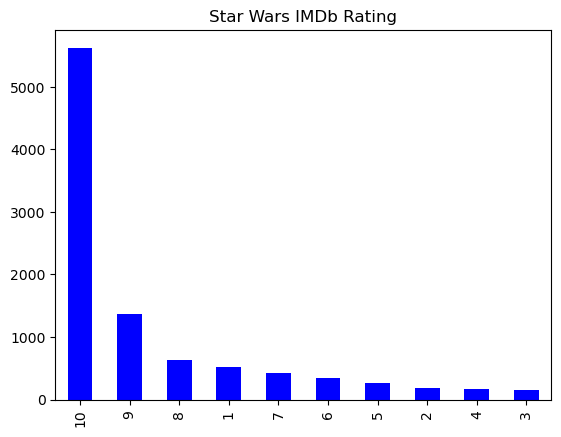

In [6]:
df.rating.value_counts().plot(kind='bar', cmap='winter', title='Star Wars IMDb Rating');

## Not using stop Words

In [9]:
# Clean the text removing unnecessary things
df['review'] = df['review'].apply(clean_text)

# Convert to vector
df['vector'] = df['review'].apply(text_to_vectors)


KeyboardInterrupt



## Using Stop Words

In [ ]:
# Clean the text removing unnecessary things
df['review'] = df['review'].apply(clean_text)
df['review'] = df['review'].apply(stop_words)

# Convert to vector
df['vector'] = df['review'].apply(text_to_vectors)


In [48]:
df.head(3)

,rating,review,vector
0,0,person saw hype claims masterpiece overreactin...,"[-0.31473646, 0.20912966, -0.86060315, -1.2628..."
1,0,movie comes truly makes impact joaquins perfor...,"[-0.036105927, 1.4407943, -1.3615227, 0.157856..."
2,0,movie felt isolated truly relate understand mo...,"[-0.91238123, 0.750262, -2.4282863, -2.7551541..."


In [10]:
df.rating = df.rating.astype(int)
df.rating = df.rating.apply(level)

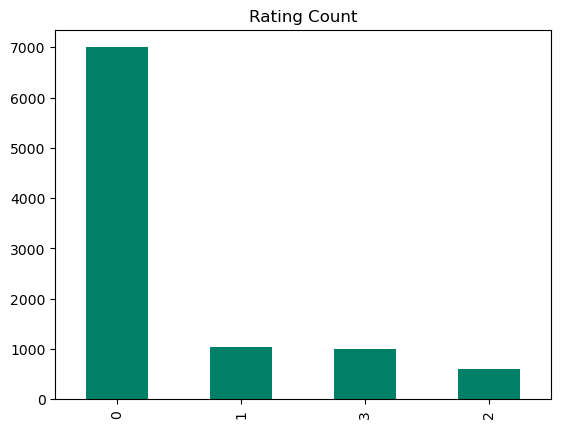

In [11]:
df.rating.value_counts().plot(kind='bar', cmap='summer', title='Rating Count');

In [13]:
level_df = pd.DataFrame({'level': [0, 1, 2, 3],
                         'range': [[10, 9], [8,7], [5,6], [1,2,3,4]]})
level_df

,level,range
0,0,"[10, 9]"
1,1,"[8, 7]"
2,2,"[5, 6]"
3,3,"[1, 2, 3, 4]"


In [ ]:
df.head(3)

# Modeling

## Important functions

In [14]:
def value_count(y_pred):
    # Get unique values and their frequencies
    unique_values, value_counts = np.unique(y_pred, return_counts=True)

    # Print the unique values and their frequencies
    for value, count in zip(unique_values, value_counts):
        print(f'{value}: {count}')


## Seperate the feature and target variable

In [84]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split

In [16]:
# Set data 
X = list(df['vector'])
y = list(df.rating.astype(int))
# Split the data into training and testing sets

np.random.seed(71)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
len(X_train), len(X_test), len(y_train), len(y_test)

(7724, 1931, 7724, 1931)

## `RandomForestClassifier`

In [18]:
# Load model
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

# Make predictions on the test set
y_pred = rfc.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy*100:.2f}%", )

Accuracy: 73.85%


In [29]:
value_count(y_pred), print(),value_count(y_test);

0: 832
1: 1
2: 1
3: 11

0: 623
1: 84
2: 52
3: 86


In [ ]:
y_pred[:10]

In [ ]:
y_test[:10]

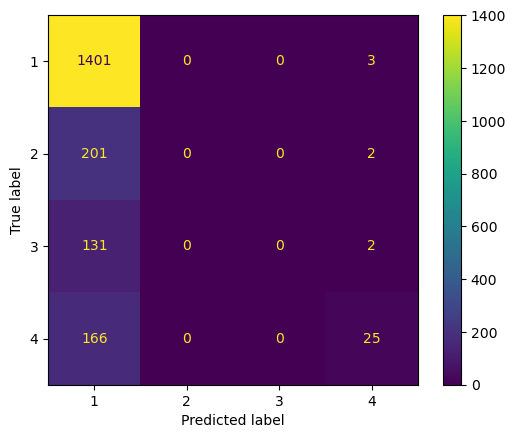

In [44]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# Make our confusion matrixx more visual with Seaborn's heatmap()
import seaborn as sb

con_mat = confusion_matrix(y_test, y_pred)

con_mat_plot = metrics.ConfusionMatrixDisplay(confusion_matrix=con_mat, display_labels=[1,2,3,4])
con_mat_plot.plot()
plt.show()

## `SupportVectorMachine`

In [60]:
# Import SVC
from sklearn.svm import SVC

# Create and train the SVM classifier
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Make predictions
y_preds = svm_model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_preds)

print(f"Accuracy: {accuracy*100:.2f}")

Accuracy: 76.23


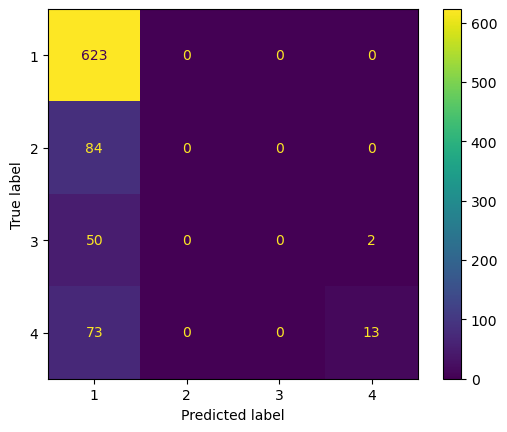

In [32]:
con_mat = confusion_matrix(y_test, y_preds)

con_mat_plot = metrics.ConfusionMatrixDisplay(confusion_matrix=con_mat, display_labels=[1,2,3,4])
con_mat_plot.plot()
plt.show()

## LogisticRegression

In [19]:
# Import logistic regression
from sklearn.linear_model import LogisticRegression


# Create and train the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions
preds = logreg.predict(X_test)

#Calculate accuracy score
accuracy = accuracy_score(y_test, preds)

print(f"Accuracy: {accuracy*100:.2f}", )

Accuracy: 76.13


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


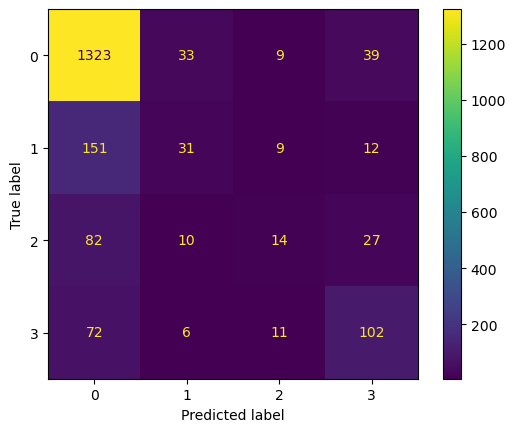

In [45]:
con_mat = confusion_matrix(y_test, preds)
con_mat
con_mat_plot = metrics.ConfusionMatrixDisplay(confusion_matrix=con_mat, display_labels=[0,1,2,3])
con_mat_plot.plot()
plt.show()

In [42]:
y_prb = logreg.predict_proba(X_test)

In [37]:
prbdf = pd.DataFrame(y_prb[:10], columns = ['0', '1', '2', '3'])
prbdf

,0,1,2,3
0,0.997264,0.001126,0.000300,0.001309
1,0.980763,0.017505,0.001210,0.000521
2,0.107291,0.058142,0.192337,0.642230
3,0.588239,0.312184,0.085195,0.014382
4,0.574555,0.248021,0.052546,0.124879
5,0.452745,0.264443,0.270593,0.012219
6,0.883294,0.023121,0.013201,0.080384
7,0.858858,0.123674,0.016687,0.000781
8,0.685035,0.163998,0.097319,0.053648
9,0.268166,0.082089,0.122157,0.527588


## Plot the probablities

<Axes: >

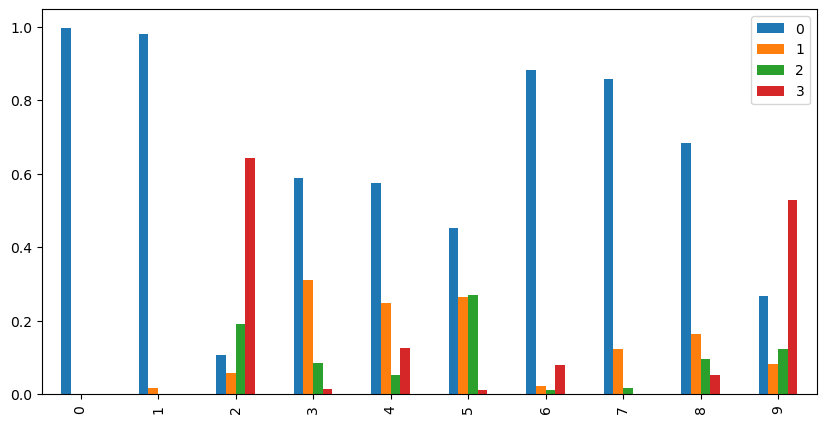

In [38]:
prbdf.plot(kind='bar', figsize=(10,5))

In [26]:
preds[0:10]

array([0, 0, 3, 0, 0, 0, 0, 0, 0, 3])

In [25]:
y_test[0:10]

[0, 0, 3, 1, 1, 0, 0, 0, 0, 2]

In [39]:
from joblib import dump

model = logreg

# Save the model to the Kaggle directory
filename = '/kaggle/working/model.joblib'
dump(model, filename)

['/kaggle/working/model.joblib']

In [ ]:
import joblib

# Load a model
loaded_model = joblib.load('model.joblib')

# Use the loaded model for predictions
predictions = loaded_model.predict(X_test)


## Test on custom data


In [102]:
data = {
    'rating': [10],
    'review': ["Great movie. Ijust loved this movie. The direction was fantastic. The acting was superb. My all family members loved it."]
}
rdf = pd.DataFrame(data)

In [104]:
rev = '''Its a very bad movie. I just hated it. The graphics and direction was very poor. My family didnt liked it at all.'''

In [105]:
def add_review(rate, rev):
    global rdf 
    # Create a new row
    new_row = {'rating': rate, 'review': rev}
    rdf = rdf.append(new_row, ignore_index=True)
    

In [106]:
add_review(2, rev)

/tmp/ipykernel_32/1972178345.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rdf = rdf.append(new_row, ignore_index=True)


In [107]:
rdf.head()

,rating,review
0,10,Great movie. Ijust loved this movie. The direc...
1,2,Its a very bad movie. I just hated it. The gra...


In [112]:
rev = '''Truly a masterpiece, The Best Hollywood film of 2019, one of the Best films of the decade... And truly the Best film to bring a comic book so chillingly and realistically to real ife. Remarkable Direction, Cinematography, Music and the Acting. Some people are surprised to find it DISTURBING and VIOLENT, but it's a necessity and message. It's about society and reflects those underappreciated/unrecognized/bullied people, proving they can do something too. The way it shows class difference, corruption and how rich and talented rule others around them is not exaggerated and that's what makes it different. It's BELIEVABLE. There could be multiple JOKERs living in our society that could shake those around them in much bitter way than the film shows making people uncomforting people. Consider this a wake up call, a message, but first a film. A PERFECT film'''

In [127]:
rev = '''Joker (2009) is a decent movie that had potential but fell short of expectations. The film showcases an intriguing storyline and some impressive performances, but it lacks depth and fails to deliver a truly captivating experience. The pacing feels uneven, and the character development could have been stronger. While it has its moments, overall, it left me wanting more. The cinematography and soundtrack are commendable, adding some redeeming qualities to the film. However, it ultimately falls into the category of an average movie that may not leave a lasting impression. If you're a fan of the Joker character or enjoy exploring different interpretations, it might still be worth a watch, but don't expect it to match the brilliance of other Joker adaptations.'''

In [128]:
add_review(7, rev)

/tmp/ipykernel_32/1972178345.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rdf = rdf.append(new_row, ignore_index=True)


In [129]:
rdf

,rating,review,vector
0,0,great movie ijust loved movie direction fantas...,"[-1.3280817, -0.711888, -3.517244, -3.5809834,..."
1,3,bad movie hated graphics direction poor family...,"[-2.355479, 0.47067267, -2.844739, -2.4421983,..."
2,0,truly masterpiece best hollywood film 2019 bes...,"[-1.0382906, 0.0014930964, -1.3903452, -1.6188..."
3,1,heard saying film year reviews flooding 10s hy...,"[-0.50227517, 0.23308602, -1.6622229, -1.48367..."
4,7,Joker (2009) is a decent movie that had potent...,NaN


In [130]:
rdf.rating = rdf.rating.apply(level)
# Clean the text removing unnecessary things
rdf['review'] = rdf['review'].apply(clean_text)
rdf['review'] = rdf['review'].apply(stop_words)

# Convert to vector
rdf['vector'] = rdf['review'].apply(text_to_vectors)

In [131]:
# Set data 
tX = list(rdf['vector'])
ty = list(rdf.rating.astype(int))

In [132]:
logreg.predict(tX)

array([0, 3, 0, 1, 0])

In [133]:
ty

[0, 3, 0, 3, 1]

In [120]:
level_df

,level,range
0,0,"[10, 9]"
1,1,"[8, 7]"
2,2,"[5, 6]"
3,3,"[1, 2, 3, 4]"


## `XgBoostClassifier`

In [58]:
# Create and fit the XGBoost classifier
model = XGBClassifier(num_class=4)
model.fit(X_train, y_train)

# Make predictions on the test set
y_prd = model.predict(X_test)
#Calculate accuracy score
accuracy = accuracy_score(y_test, y_prd)

print(f"Accuracy: {accuracy*100:.2f}", )

Accuracy: 75.61


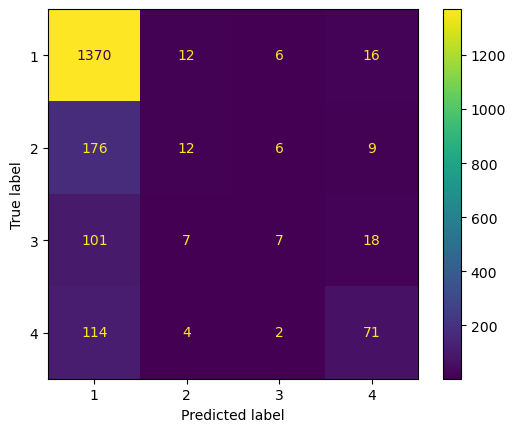

In [59]:
con_mat = confusion_matrix(y_test, y_prd)
con_mat
con_mat_plot = metrics.ConfusionMatrixDisplay(confusion_matrix=con_mat, display_labels=[1,2,3,4])
con_mat_plot.plot()
plt.show()

## Model Comparision

In [61]:
model_score = {
    'name': ['RFC', 'SVM', 'LogisticRegression', 'XBClassifier'],
    'score': [rfc.score(X_test, y_test), svm_model.score(X_test, y_test), logreg.score(X_test, y_test), model.score(X_test, y_test)]
}
# Convert the dictionary to a DataFrame
scores = pd.DataFrame(model_score)

# Print the DataFrame
scores

,name,score
0,RFC,0.739513
1,SVM,0.762299
2,LogisticRegression,0.761264
3,XBClassifier,0.756085


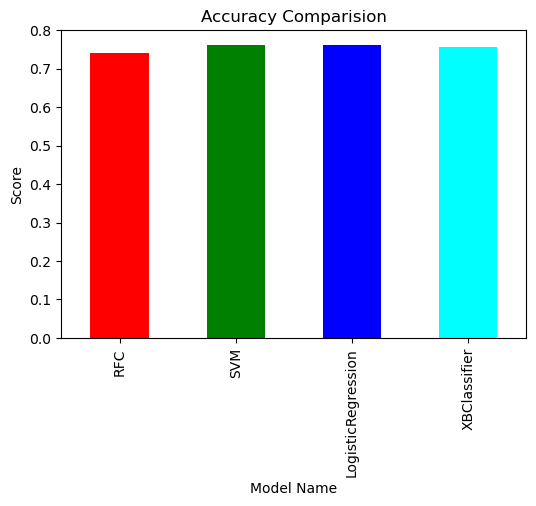

In [62]:
# Create a figure with a custom figsize

# Plot the DataFrame
scores.plot(x='name', y='score', kind='bar', color=['red', 'green', 'blue', 'cyan'], figsize=(6, 4), legend=False)
# plt.legend(False)
plt.xlabel('Model Name')
plt.ylabel('Score')
plt.title('Accuracy Comparision')

# Display the plot
plt.show();

In [40]:
from sklearn.model_selection import cross_val_score

def max_cv_score(model):
    '''
    Max Cross Val score of model
    '''
    ans = cross_val_score(model, X, y, cv=5)
    print(f'Highest accuracy: {max(ans)*100:.0f}%.');

In [ ]:
max_cv_score(logreg)

## Raff section

## Merged section


In [60]:
import pandas as pd
# Create the first dataframe
df1 = pd.read_csv('/kaggle/input/movie-review/The Lord of the Rings The Fellowship of the Ring 2001.csv')

# Create the second dataframe
df2 = pd.read_csv('/kaggle/input/movie-review/The Dark Knight 2008.csv')

df3 = pd.read_csv('/kaggle/input/movie-review/Star Wars Episode VIII - The Last Jedi 2017.csv')
df4 = pd.read_csv('/kaggle/input/movie-review/Star Wars Episode VII - The Force Awakens 2015.csv')
df5 = pd.read_csv('/kaggle/input/movie-review/Joker 2019.csv')
# Concatenate the dataframes
merged_df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

In [61]:
merged_df.shape

(33527, 7)

In [62]:
merged_df.head(3)

,username,rating,helpful,total,date,title,review
0,NRGWasp,10,170,179,2 May 2002,An absolutely incredible film!\n,Simply incredible. Never before have I seen a ...
1,minionlost,Null,301,342,11 December 2001,Wow!\n,Breathtaking. Unique. Captivating. Enchanti...
2,MR_Heraclius,10,55,59,15 February 2020,Great\n,It is my firm belief that the standard version...


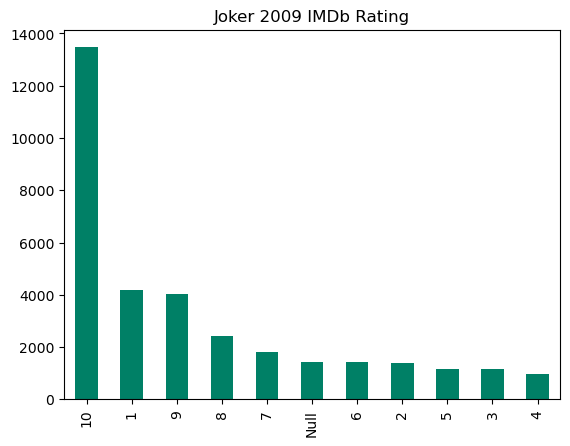

In [63]:
merged_df.rating.value_counts().plot(kind='bar', cmap='summer', title='Joker 2009 IMDb Rating');

In [67]:
df = setup_data(merged_df)
df.shape

(32081, 2)

In [69]:
def drop_ten(n, df):
    
    for i in range(n):
        ind_to_drop = np.random.randint(1,29000)
        try:
            if df.rating[ind_to_drop] == '10':
                df = df.drop(ind_to_drop)
        except:
            continue
    return df

In [76]:
df = drop_ten(5000, df)
df.shape

(25501, 2)

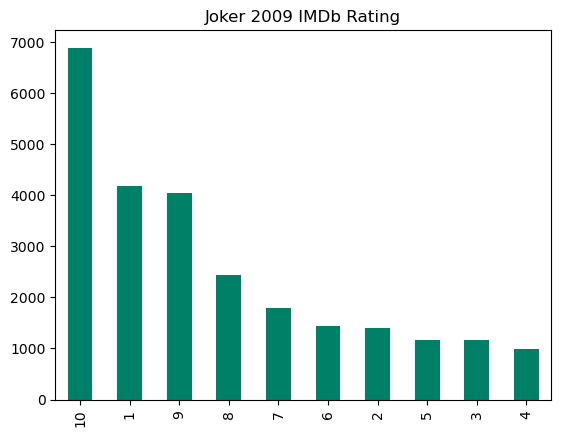

In [77]:

df.rating.value_counts().plot(kind='bar', cmap='summer', title='Joker 2009 IMDb Rating');

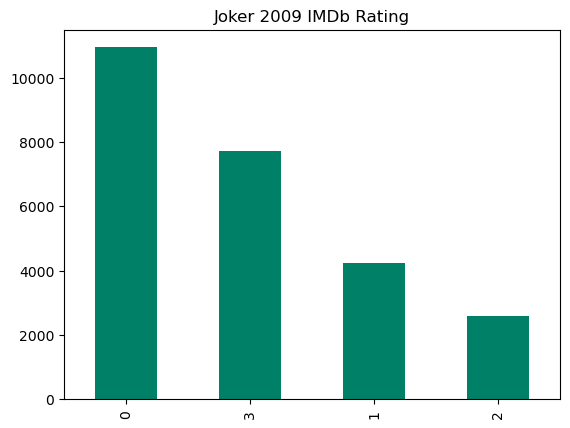

In [83]:
# df.rating = df.rating.astype(int)
# df.rating = df.rating.apply(level)

df.rating.value_counts().plot(kind='bar', cmap='summer', title='Joker 2009 IMDb Rating');

In [80]:
# Clean the text removing unnecessary things
df['review'] = df['review'].apply(clean_text)
df['review'] = df['review'].apply(stop_words)

# Convert to vector
df['vector'] = df['review'].apply(text_to_vectors)

In [82]:
df.head(2)

,rating,review,vector
0,0,simply incredible seen 3 hour movie nt like 3 ...,"[-0.41441154, -0.13041809, -1.4737537, -0.5502..."
4,0,oh thankful movie kept having big large smile ...,"[-0.33428442, 0.35354123, -1.8643193, -1.03831..."


In [85]:
# Set data 
X = list(df['vector'])
y = list(df.rating.astype(int))
# Split the data into training and testing sets

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
len(X_train), len(X_test), len(y_train), len(y_test)

(20400, 5101, 20400, 5101)

In [86]:
# Load model
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

# Make predictions on the test set
y_pred = rfc.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy*100:.2f}%", )

Accuracy: 60.95%


In [89]:
# Create and fit the XGBoost classifier
model = XGBClassifier(num_class=4)
model.fit(X_train, y_train)

# Make predictions on the test set
y_prd = model.predict(X_test)
#Calculate accuracy score
accuracy = accuracy_score(y_test, y_prd)

print(f"Accuracy: {accuracy*100:.2f}", )

Accuracy: 63.93


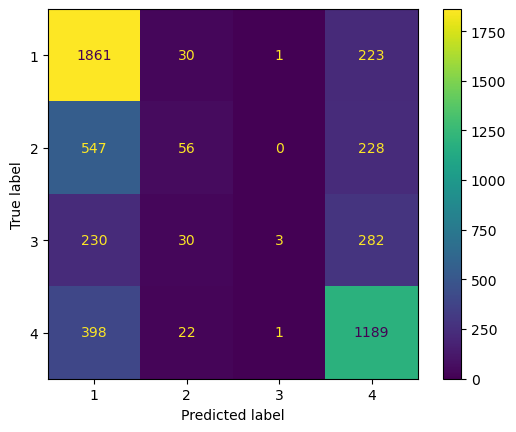

In [88]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# Make our confusion matrixx more visual with Seaborn's heatmap()
import seaborn as sb

con_mat = confusion_matrix(y_test, y_pred)

con_mat_plot = metrics.ConfusionMatrixDisplay(confusion_matrix=con_mat, display_labels=[1,2,3,4])
con_mat_plot.plot()
plt.show()

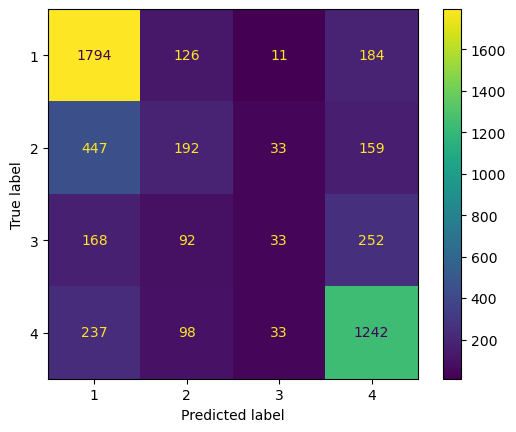

In [90]:
con_mat = confusion_matrix(y_test, y_prd)

con_mat_plot = metrics.ConfusionMatrixDisplay(confusion_matrix=con_mat, display_labels=[1,2,3,4])
con_mat_plot.plot()
plt.show()

In [91]:
# Import logistic regression
from sklearn.linear_model import LogisticRegression


# Create and train the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions
preds = logreg.predict(X_test)

#Calculate accuracy score
accuracy = accuracy_score(y_test, preds)

print(f"Accuracy: {accuracy*100:.2f}", )

Accuracy: 65.89


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


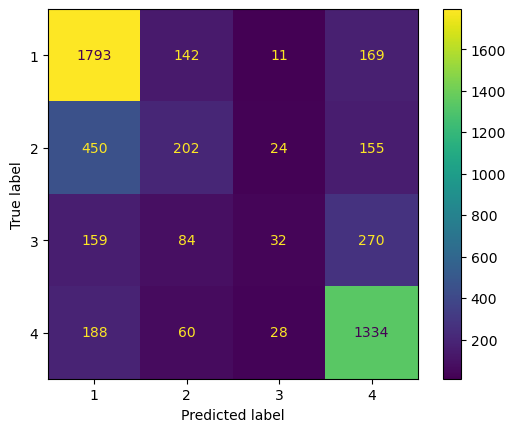

In [92]:
con_mat = confusion_matrix(y_test, preds)

con_mat_plot = metrics.ConfusionMatrixDisplay(confusion_matrix=con_mat, display_labels=[1,2,3,4])
con_mat_plot.plot()
plt.show()

In [93]:
from sklearn.model_selection import cross_val_score

def max_cv_score(model):
    '''
    Max Cross Val score of model
    '''
    ans = cross_val_score(model, X, y, cv=5)
    print(f'Highest accuracy: {max(ans)*100:.0f}%.');

In [94]:
max_cv_score(logreg)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Highest accuracy: 68%.


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
